# import

In [3]:
from PIL import Image
from PIL import ImageOps
from matplotlib.pyplot import imshow

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os

# Read

In [9]:
FILE_DIR = '../imgs/clean_2_augmented'
AUG_DIR = FILE_DIR
file_names = next(os.walk(FILE_DIR))[2]
temp = []
for i in range(500):
    if '59' in file_names[i]:
        temp.append(file_names[i])
file_1 = os.path.join(FILE_DIR, temp[0])
file_2 = os.path.join(FILE_DIR, temp[1])
file_3 = os.path.join(FILE_DIR, temp[4])
print(file_1, file_2, file_3)

../imgs/clean_2_augmented/class_59_r.jpg ../imgs/clean_2_augmented/class_59_r_+_9.jpg ../imgs/clean_2_augmented/class_59_-_9.jpg


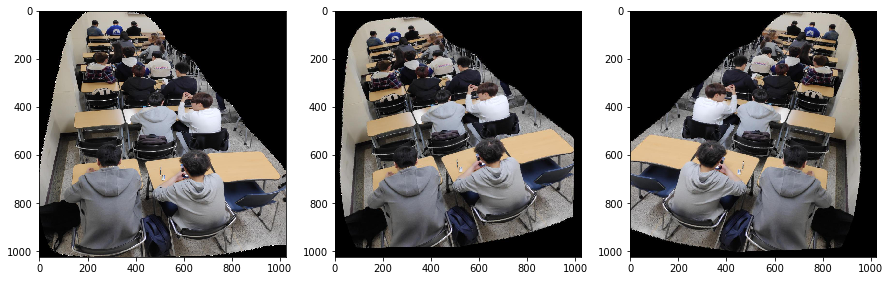

In [5]:
image2 = Image.open(file_1, mode='r')
image3 = Image.open(file_2, mode='r')
image4 = Image.open(file_3, mode='r')

fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.imshow(image2)
ax2.imshow(image3)
ax3.imshow(image4)
plt.show()

In [10]:
# 사이즈 다운샘플링

for file_name in file_names:
    image = Image.open(os.path.join(FILE_DIR, file_name), mode='r')
    file_name = file_name.split('.')[0]
    image.resize(size=(1024,1024), resample=Image.LANCZOS).save(os.path.join(AUG_DIR, '{}.jpg'.format(file_name)))


# DATA AUGRMENTATION
- Perspective warp
- Rotate
- Reverse

In [18]:
# Perspective Warping

def create_param():
    # perspective warping parameter
    r = np.random.ranf(size=4) / 20
    data = [1 + r[0], r[1], 0,
           r[2], 1 + r[3], 0,
           0, 0]
    return data


file_names = next(os.walk(AUG_DIR))[2]

for file_name in file_names:
    
    image = Image.open(os.path.join(AUG_DIR, file_name), mode='r')
    image_mirror = ImageOps.mirror(image) # 좌우 반전
    
    file_name = file_name.split('.')[0]
    image_mirror.save(os.path.join(AUG_DIR, file_name + '_r.jpg'))
    for i in range(4, 15, 5):
        # 1~14도 회전 후 perspective warping
        image.rotate(-i).transform(image.size, Image.PERSPECTIVE, create_param(), Image.BILINEAR).save(os.path.join(AUG_DIR, file_name + '_-_{}.jpg'.format(i)))
        image.rotate(i).transform(image.size, Image.PERSPECTIVE, create_param(), Image.BILINEAR).save(os.path.join(AUG_DIR, file_name + '_+_{}.jpg'.format(i)))
        image_mirror.rotate(-i).transform(image.size, Image.PERSPECTIVE, create_param(), Image.BILINEAR).save(os.path.join(AUG_DIR, file_name + '_r' + '_-_{}.jpg'.format(i)))
        image_mirror.rotate(i).transform(image.size, Image.PERSPECTIVE, create_param(), Image.BILINEAR).save(os.path.join(AUG_DIR, file_name + '_r' + '_+_{}.jpg'.format(i)))


# Perspective warping TEST

![image](https://user-images.githubusercontent.com/12870549/55596630-7e6ec900-5784-11e9-97a2-4aa1b985e5a2.png)


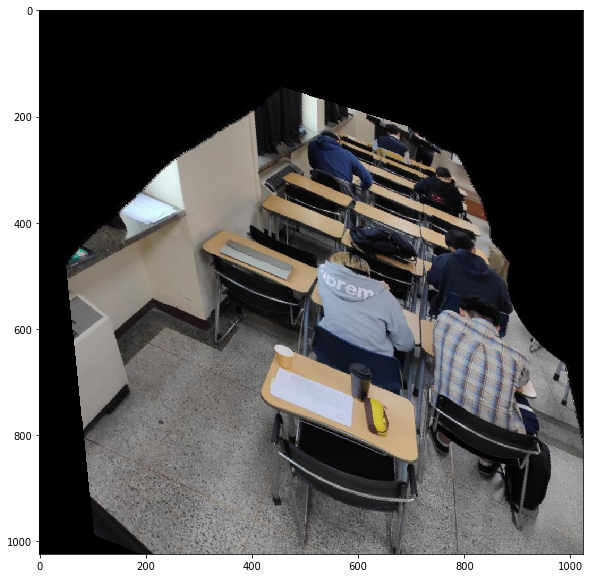

In [12]:
transformed = image.transform(
    image.size, Image.PERSPECTIVE, # 심한 warping TEST
    [
        0.95, -0.1, 0, 
        -0.3, 0.95, 0,
        0, 0
    ],
    Image.BILINEAR
)

fig = plt.figure(figsize=(10, 10))
plt.imshow(transformed)

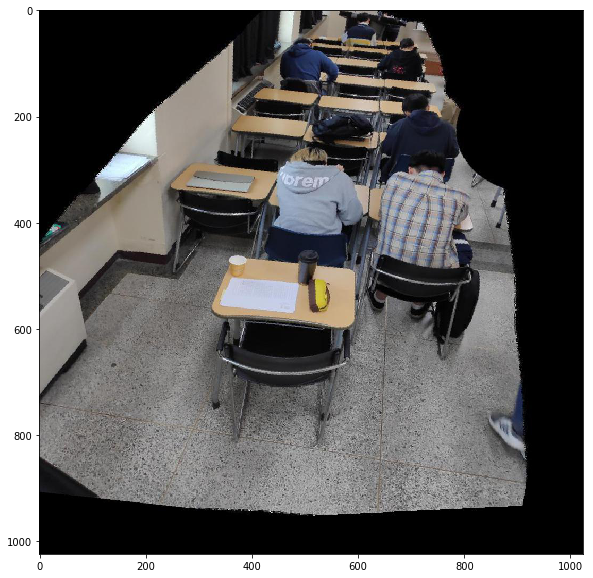

In [13]:
transformed = image.transform(
    image.size, Image.PERSPECTIVE,  # 그대로 출력하기
    [
        1, 0, 0, 
        0, 1, 0,
        0, 0
    ],
    Image.BILINEAR
)
fig = plt.figure(figsize=(10, 10))
plt.imshow(transformed)